In [2]:
!pip install ultralytics
!pip install roboflow  # optional, if using Roboflow dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="i3bKsyqWKEPBGcrX53Sn")
project = rf.workspace("vishwajitsingh13").project("person-detection-9a6mk-iofzq")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-detection-1 in yolov8:: 100%|██████████| 5102/5102 [00:05<00:00, 960.04it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!cat /content/Person-detection-1/data.yaml

names:
- Persona
nc: 1
roboflow:
  license: CC BY 4.0
  project: person-detection-9a6mk-iofzq
  url: https://universe.roboflow.com/vishwajitsingh13/person-detection-9a6mk-iofzq/dataset/1
  version: 1
  workspace: vishwajitsingh13
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 nano model
model = YOLO('yolov8n.pt')  # Switch to 'yolov8s.pt' or 'yolov8m.pt' for better accuracy if your GPU allows

model.train(
    data='/content/Person-detection-1/data.yaml',
    epochs=150,              # More epochs for deeper learning
    imgsz=640,
    batch=16,
    patience=30,             # Early stopping to avoid overfitting
    val=True,                # Validate every epoch
    lr0=0.001,               # Initial learning rate
    lrf=0.01,                # Final learning rate fraction
    optimizer='Adam',        # Adam performs better on complex datasets
    warmup_epochs=3,         # Helps stabilize early training
    cos_lr=True,             # Cosine learning rate scheduler
    hsv_h=0.015,             # Hue augmentation
    hsv_s=0.7,               # Saturation augmentation
    hsv_v=0.4,               # Brightness augmentation
    degrees=10.0,            # Rotation
    translate=0.1,           # Translation
    scale=0.5,               # Scaling
    shear=2.0,               # Shear
    perspective=0.0005,      # Slight perspective change
    flipud=0.0,              # Disable vertical flip (unnatural for people)
    fliplr=0.5,              # Enable horizontal flip
    mosaic=1.0,              # Use Mosaic augmentation
    mixup=0.2,               # Use MixUp for regularization
    cache=True,              # Cache images in memory for faster training
    seed=42                  # Reproducibility
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 71.5MB/s]


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Person-detection-1/data.yaml, epochs=150, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 44.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 179MB/s]


AMP: checks passed ✅


train: Scanning /content/Person-detection-1/train/labels... 1469 images, 23 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<00:00, 2048.41it/s]

train: New cache created: /content/Person-detection-1/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.1GB RAM): 100%|██████████| 1469/1469 [00:39<00:00, 36.92it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Person-detection-1/valid/labels... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:01<00:00, 853.81it/s]


val: New cache created: /content/Person-detection-1/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 1071/1071 [00:29<00:00, 36.32it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.27G      1.534       1.65      1.471         69        640: 100%|██████████| 92/92 [00:32<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]


                   all       1071       2293      0.661       0.51      0.575      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.79G      1.505      1.358      1.452         64        640: 100%|██████████| 92/92 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]

                   all       1071       2293      0.717      0.604      0.663      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.81G      1.483      1.314       1.46         41        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1071       2293      0.735      0.581      0.642      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.83G      1.464       1.31      1.454         97        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1071       2293       0.76      0.634      0.699      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.84G      1.466      1.276      1.444         36        640: 100%|██████████| 92/92 [00:29<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.30it/s]

                   all       1071       2293      0.772      0.632      0.715      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.86G      1.439       1.23      1.436         57        640: 100%|██████████| 92/92 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.34it/s]

                   all       1071       2293      0.713      0.597      0.675      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.88G      1.441      1.229      1.432         90        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.05it/s]


                   all       1071       2293      0.744      0.663      0.719      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       2.9G      1.402       1.22      1.426         71        640: 100%|██████████| 92/92 [00:34<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1071       2293      0.752      0.619      0.697      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.91G      1.397      1.194      1.402         65        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]


                   all       1071       2293      0.785      0.656       0.73      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.93G      1.373      1.126       1.38         83        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.01it/s]

                   all       1071       2293      0.743      0.664      0.732      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.12G      1.376      1.136       1.39         79        640: 100%|██████████| 92/92 [00:31<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.09it/s]

                   all       1071       2293      0.758      0.656      0.724      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.14G      1.334       1.08      1.369         71        640: 100%|██████████| 92/92 [00:31<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.97it/s]

                   all       1071       2293      0.774      0.616      0.706      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.16G      1.335      1.083      1.362         49        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.36it/s]

                   all       1071       2293      0.789      0.668      0.745      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.18G      1.328      1.078      1.364         66        640: 100%|██████████| 92/92 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1071       2293      0.791      0.663      0.742      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.19G      1.315      1.047      1.349         80        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1071       2293      0.799      0.668      0.756      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.21G       1.27      1.036      1.323         47        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]


                   all       1071       2293      0.808      0.642      0.738      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.23G      1.285      1.039      1.347        137        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.11it/s]


                   all       1071       2293      0.775      0.657      0.741       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.24G      1.278      1.022      1.345         84        640: 100%|██████████| 92/92 [00:31<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.07it/s]

                   all       1071       2293      0.753      0.675      0.719      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.26G      1.265      1.026      1.322         38        640: 100%|██████████| 92/92 [00:31<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.02it/s]

                   all       1071       2293      0.791      0.692      0.761      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.28G      1.246     0.9871      1.311        103        640: 100%|██████████| 92/92 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all       1071       2293      0.788      0.664      0.746      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.29G      1.289      1.014      1.348         80        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1071       2293      0.782      0.679       0.75      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.31G      1.249     0.9815      1.319         77        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1071       2293      0.769      0.671      0.737      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.33G      1.233     0.9701      1.307         58        640: 100%|██████████| 92/92 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1071       2293      0.768      0.678      0.744      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.35G      1.221     0.9535      1.288        111        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]


                   all       1071       2293      0.793      0.678      0.747      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.36G      1.221     0.9747      1.308         50        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.02it/s]

                   all       1071       2293      0.793      0.679      0.753      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.38G       1.22     0.9337      1.281         57        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.15it/s]

                   all       1071       2293      0.785      0.687      0.749      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       3.4G      1.231     0.9487        1.3        105        640: 100%|██████████| 92/92 [00:31<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.08it/s]

                   all       1071       2293      0.793      0.687      0.759      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.41G      1.212     0.9485      1.293         67        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]

                   all       1071       2293      0.818        0.7      0.775      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.43G      1.201     0.9206      1.281         89        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1071       2293      0.795      0.693      0.763      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.45G      1.189     0.9154      1.286         64        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1071       2293      0.801      0.692      0.755      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.46G      1.175     0.9103      1.269         74        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1071       2293      0.799      0.687      0.753      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.48G      1.176     0.8991      1.277         55        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]


                   all       1071       2293       0.81      0.663      0.754      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150       3.5G      1.197     0.9242       1.28         57        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.97it/s]

                   all       1071       2293      0.814       0.67      0.761       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.52G       1.16      0.883      1.254         68        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.15it/s]

                   all       1071       2293        0.8      0.685      0.765      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.53G      1.167      0.892      1.265        100        640: 100%|██████████| 92/92 [00:30<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]

                   all       1071       2293      0.804      0.691      0.765      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.55G      1.164     0.8981      1.262        132        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1071       2293      0.812      0.671      0.748      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.57G      1.152     0.8893      1.255         99        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1071       2293      0.815      0.676      0.764      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.58G      1.163     0.8923      1.266         80        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1071       2293      0.827      0.669      0.767      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       3.6G      1.142     0.8645      1.254         45        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all       1071       2293      0.795      0.674      0.748      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.62G      1.135     0.8624      1.246         66        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.13it/s]


                   all       1071       2293      0.809        0.7      0.774      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.64G      1.146     0.8617      1.261         49        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]

                   all       1071       2293      0.813      0.671      0.757      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.65G      1.129     0.8417      1.246         87        640: 100%|██████████| 92/92 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]

                   all       1071       2293      0.827      0.648      0.757      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.67G      1.144      0.857      1.264         85        640: 100%|██████████| 92/92 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1071       2293      0.784      0.681      0.745      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.69G      1.123     0.8385      1.241         68        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1071       2293      0.822      0.691       0.78      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       3.7G      1.113     0.8291      1.236         89        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1071       2293      0.824      0.701      0.776      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.72G       1.11     0.8282       1.23         89        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1071       2293      0.832      0.687      0.778      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.74G      1.121     0.8299      1.232         50        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]

                   all       1071       2293      0.818      0.696       0.78      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.75G      1.124     0.8333      1.248         59        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]

                   all       1071       2293       0.83      0.696      0.785      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.77G      1.133     0.8441      1.245         76        640: 100%|██████████| 92/92 [00:30<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.14it/s]

                   all       1071       2293      0.751      0.656      0.697      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.79G      1.129     0.8355      1.228        113        640: 100%|██████████| 92/92 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.05it/s]

                   all       1071       2293      0.814      0.708      0.777      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       3.8G      1.088     0.7959       1.22        125        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1071       2293      0.826      0.694       0.79      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.82G      1.086     0.8009      1.217         96        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1071       2293      0.817      0.703      0.775      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.84G      1.071     0.7956      1.209         97        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1071       2293      0.805      0.706      0.775      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.86G      1.092     0.8008      1.205         48        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.54it/s]

                   all       1071       2293      0.812      0.703      0.777       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.87G      1.098     0.8007      1.218        125        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]


                   all       1071       2293      0.816      0.706       0.78      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.89G      1.082      0.802      1.209         77        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.14it/s]

                   all       1071       2293      0.841      0.709       0.79      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.91G      1.083     0.8043      1.209         69        640: 100%|██████████| 92/92 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]

                   all       1071       2293      0.823      0.694       0.78      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.93G      1.075     0.7905      1.219         70        640: 100%|██████████| 92/92 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.10it/s]

                   all       1071       2293      0.825      0.687      0.781      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.94G      1.072     0.7913      1.213         65        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1071       2293      0.818      0.705      0.786      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.96G      1.066     0.7752      1.202         60        640: 100%|██████████| 92/92 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1071       2293       0.83      0.702      0.782      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.97G      1.053     0.7766        1.2         68        640: 100%|██████████| 92/92 [00:29<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]

                   all       1071       2293      0.842      0.715      0.797      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.99G      1.055     0.7583      1.196        103        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.95it/s]


                   all       1071       2293      0.823      0.701      0.786      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.01G      1.055     0.7801      1.205         61        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.01it/s]

                   all       1071       2293      0.816      0.701      0.781      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.03G      1.052     0.7671       1.19         54        640: 100%|██████████| 92/92 [00:30<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.16it/s]

                   all       1071       2293      0.839      0.714      0.798      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.04G      1.019     0.7538      1.191         42        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.63it/s]

                   all       1071       2293      0.835      0.705      0.787       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.06G      1.038     0.7557      1.189         74        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1071       2293      0.821       0.72      0.797      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.08G      1.028      0.738      1.185         70        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]

                   all       1071       2293      0.838      0.693      0.785      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       4.1G      1.037       0.75       1.18         84        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]

                   all       1071       2293        0.8      0.728       0.79      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.11G      1.013     0.7396      1.179         96        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.05it/s]

                   all       1071       2293      0.819       0.72      0.795      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.13G      1.043     0.7594      1.192         83        640: 100%|██████████| 92/92 [00:31<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.07it/s]

                   all       1071       2293      0.818      0.713      0.793      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.15G      1.028     0.7324      1.178         77        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all       1071       2293       0.84      0.709        0.8      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.16G      1.024     0.7435       1.18         88        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]

                   all       1071       2293      0.843      0.705      0.789      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.18G      1.014     0.7479      1.177         69        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]

                   all       1071       2293      0.846      0.705      0.803      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       4.2G      1.006     0.7315      1.172         55        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1071       2293      0.828      0.717      0.794      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.21G       1.01     0.7265      1.168         80        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1071       2293      0.836      0.711      0.793      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.23G      1.001     0.7239      1.169         53        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.94it/s]


                   all       1071       2293      0.831        0.7      0.792      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.25G      1.007     0.7191      1.175         61        640: 100%|██████████| 92/92 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.09it/s]

                   all       1071       2293      0.842      0.703        0.8      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.27G     0.9948      0.703      1.165         93        640: 100%|██████████| 92/92 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.13it/s]

                   all       1071       2293       0.85      0.709      0.798      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.28G     0.9784     0.7153      1.166         51        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1071       2293      0.823      0.718      0.803      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       4.3G      0.985     0.7029      1.153        117        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1071       2293      0.799      0.741      0.802      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.32G     0.9897     0.7026      1.165         39        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1071       2293      0.828      0.732      0.804      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.33G     0.9955     0.7039       1.16         78        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]


                   all       1071       2293      0.811      0.703      0.794      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.35G     0.9848     0.7107       1.16         65        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.15it/s]

                   all       1071       2293      0.829      0.717        0.8      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.37G     0.9835     0.6988      1.148         76        640: 100%|██████████| 92/92 [00:31<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]

                   all       1071       2293      0.818      0.718      0.797      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.38G     0.9886      0.726      1.162         60        640: 100%|██████████| 92/92 [00:31<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.22it/s]

                   all       1071       2293      0.822       0.73      0.807      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       4.4G     0.9703     0.7065      1.154         82        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1071       2293      0.832      0.727       0.81      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.42G      0.983     0.6951      1.148        133        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1071       2293      0.838      0.725      0.805      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.44G     0.9633     0.6742      1.143        103        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1071       2293      0.834       0.72      0.803      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.45G     0.9683     0.6812      1.147         62        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.76it/s]

                   all       1071       2293      0.827      0.713      0.799       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.47G     0.9628     0.6773      1.141         96        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.07it/s]

                   all       1071       2293       0.84      0.721      0.813      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.49G     0.9472     0.6688      1.129         66        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.10it/s]

                   all       1071       2293      0.832      0.736      0.811      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       4.5G     0.9586     0.6731      1.145         54        640: 100%|██████████| 92/92 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]

                   all       1071       2293      0.841      0.724       0.81      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.52G     0.9502     0.6833      1.149         73        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1071       2293      0.845      0.724      0.812      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.54G     0.9495     0.6634      1.137         82        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1071       2293      0.851      0.719      0.809      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.55G     0.9503     0.6677      1.148        100        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all       1071       2293      0.837      0.727       0.81      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.57G     0.9471     0.6651      1.144         71        640: 100%|██████████| 92/92 [00:29<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.16it/s]

                   all       1071       2293      0.813      0.736      0.811      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.59G     0.9182     0.6523      1.123         80        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.06it/s]

                   all       1071       2293      0.855      0.719       0.82      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.61G      0.944     0.6679      1.146        104        640: 100%|██████████| 92/92 [00:30<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.81it/s]

                   all       1071       2293      0.836      0.738      0.815      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.62G     0.9374     0.6593      1.128         60        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1071       2293       0.85      0.717      0.812      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.64G     0.9127     0.6376      1.116         55        640: 100%|██████████| 92/92 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1071       2293      0.837      0.725      0.812        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.66G     0.9162     0.6361      1.123         44        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]


                   all       1071       2293      0.831      0.735      0.817      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.68G     0.9247     0.6421      1.122         53        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.12it/s]

                   all       1071       2293      0.849      0.724      0.815      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.69G     0.9239      0.642      1.122         72        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]

                   all       1071       2293      0.823      0.731      0.809      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.71G     0.9288     0.6414      1.117        101        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.63it/s]

                   all       1071       2293      0.849       0.73      0.821      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.73G     0.9385     0.6437      1.125        118        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1071       2293      0.823      0.738      0.821      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.74G     0.9188     0.6462      1.129         65        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1071       2293       0.84      0.722      0.816      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.76G      0.908     0.6327      1.127         62        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1071       2293      0.846      0.721      0.814      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.78G      0.904     0.6256      1.107         98        640: 100%|██████████| 92/92 [00:29<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.95it/s]


                   all       1071       2293       0.83      0.748      0.819      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.79G     0.9115     0.6231      1.114         65        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.13it/s]

                   all       1071       2293      0.848      0.723      0.812      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.81G     0.8916     0.6229      1.105         94        640: 100%|██████████| 92/92 [00:30<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]

                   all       1071       2293      0.849      0.718      0.816      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.83G     0.9024     0.6291      1.123         64        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1071       2293       0.84      0.736      0.817      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.85G     0.8983     0.6325       1.12         66        640: 100%|██████████| 92/92 [00:29<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1071       2293      0.855      0.728      0.821      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.86G     0.8922     0.6245      1.103         55        640: 100%|██████████| 92/92 [00:29<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1071       2293      0.833      0.744      0.818        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.88G     0.9026     0.6259      1.121         75        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.59it/s]

                   all       1071       2293       0.83      0.745      0.818      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       4.9G     0.9063     0.6258      1.106         87        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.09it/s]

                   all       1071       2293      0.839      0.744      0.821      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.91G     0.8962     0.6301      1.115         48        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.05it/s]

                   all       1071       2293      0.838      0.737      0.821      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.93G     0.8652     0.6073      1.094         79        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.08it/s]

                   all       1071       2293      0.838       0.74      0.822      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.95G     0.9018     0.6169       1.11         55        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1071       2293      0.844      0.733      0.822      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.96G     0.8613      0.609      1.096         94        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1071       2293      0.836      0.736      0.824      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.98G     0.8737     0.6058      1.101         56        640: 100%|██████████| 92/92 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1071       2293      0.829       0.74      0.823      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150         5G     0.8626     0.6129      1.102         76        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1071       2293      0.842      0.741       0.82      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.02G     0.8677     0.6071        1.1        106        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.27it/s]

                   all       1071       2293       0.84      0.738      0.825      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      5.03G     0.8654      0.597      1.091         71        640: 100%|██████████| 92/92 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.08it/s]

                   all       1071       2293      0.839      0.743      0.826      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.05G     0.8741     0.6038      1.098         68        640: 100%|██████████| 92/92 [00:30<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.13it/s]

                   all       1071       2293      0.826       0.75      0.824      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.07G     0.8624     0.6033      1.101         59        640: 100%|██████████| 92/92 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.70it/s]

                   all       1071       2293      0.834      0.747      0.822      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      5.08G     0.8698     0.6087      1.095         63        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1071       2293      0.842      0.737      0.823      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150       5.1G     0.8618     0.5916      1.095        114        640: 100%|██████████| 92/92 [00:29<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1071       2293      0.841      0.734      0.824      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.12G     0.8868     0.6102       1.11         87        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.27it/s]

                   all       1071       2293      0.852      0.733      0.825      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.13G     0.8561     0.5939      1.086         51        640: 100%|██████████| 92/92 [00:30<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all       1071       2293      0.842      0.735      0.825      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      5.15G     0.8527     0.5846      1.087         74        640: 100%|██████████| 92/92 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.26it/s]

                   all       1071       2293      0.853      0.726      0.823      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.17G     0.8643     0.5926      1.094         66        640: 100%|██████████| 92/92 [00:31<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.12it/s]

                   all       1071       2293      0.835      0.743      0.825      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.19G     0.8572     0.5835      1.091         58        640: 100%|██████████| 92/92 [00:30<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.14it/s]

                   all       1071       2293      0.821      0.757      0.827      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150       5.2G     0.8556     0.5962      1.096         99        640: 100%|██████████| 92/92 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.71it/s]

                   all       1071       2293      0.822      0.754      0.826      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      5.22G     0.8408     0.5866      1.087        124        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.30it/s]

                   all       1071       2293      0.821      0.758      0.829      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      5.24G     0.8483     0.5868      1.086         67        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.32it/s]

                   all       1071       2293      0.847      0.734      0.826      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.25G     0.8622     0.5961      1.092         54        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1071       2293      0.841       0.74      0.825      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.27G     0.8481     0.5881      1.095         78        640: 100%|██████████| 92/92 [00:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]


                   all       1071       2293      0.852       0.73      0.825      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      5.29G     0.8425     0.5811      1.083         44        640: 100%|██████████| 92/92 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]

                   all       1071       2293      0.858      0.734      0.827      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      5.31G     0.8492      0.579      1.085        109        640: 100%|██████████| 92/92 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.08it/s]

                   all       1071       2293      0.856      0.728      0.824      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.32G     0.8537     0.5874      1.087         89        640: 100%|██████████| 92/92 [00:30<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.10it/s]

                   all       1071       2293      0.847      0.737      0.826      0.515


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.34G      1.069      0.713      1.177         20        640: 100%|██████████| 92/92 [00:28<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1071       2293      0.831      0.727      0.809        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      5.36G      1.046     0.6631      1.152         19        640: 100%|██████████| 92/92 [00:26<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]

                   all       1071       2293      0.845      0.714      0.808      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      5.37G      1.046      0.645      1.155         37        640: 100%|██████████| 92/92 [00:26<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]

                   all       1071       2293      0.839       0.73      0.815      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.39G      1.035     0.6392      1.147         23        640: 100%|██████████| 92/92 [00:26<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1071       2293      0.846      0.733      0.819      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.41G       1.03     0.6301      1.135         55        640: 100%|██████████| 92/92 [00:26<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.04it/s]

                   all       1071       2293      0.847       0.73       0.82      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.42G      1.006     0.6264      1.142         28        640: 100%|██████████| 92/92 [00:26<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1071       2293      0.828      0.744      0.823      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.44G      1.006     0.6196      1.129         38        640: 100%|██████████| 92/92 [00:26<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.21it/s]

                   all       1071       2293      0.848      0.734      0.823      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.46G      1.021     0.6247       1.14         42        640: 100%|██████████| 92/92 [00:26<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1071       2293      0.842      0.738      0.823      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.47G      1.009     0.6117      1.125         56        640: 100%|██████████| 92/92 [00:26<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]

                   all       1071       2293      0.841      0.736      0.824      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      5.49G      1.014      0.622      1.134         14        640: 100%|██████████| 92/92 [00:26<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.21it/s]

                   all       1071       2293       0.86      0.723      0.824      0.517



150 epochs completed in 1.567 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.58it/s]


                   all       1071       2293      0.836      0.743      0.825      0.521
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e59e0e0a510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # nano model for fast training

model.train(
    data='/content/Person-detection-1/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    patience=30,
    val=True,
    lr0=0.001,
    lrf=0.01,
    optimizer='Adam',
    warmup_epochs=3,
    cos_lr=True
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 140MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Person-detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 44.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 132MB/s]


AMP: checks passed ✅


train: Scanning /content/Person-detection-1/train/labels... 1469 images, 23 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<00:00, 2276.72it/s]

train: New cache created: /content/Person-detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Person-detection-1/valid/labels... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:01<00:00, 923.32it/s]


val: New cache created: /content/Person-detection-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.21G      1.173      1.646      1.186         50        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.21it/s]


                   all       1071       2293       0.67      0.473      0.539      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.72G      1.351      1.487      1.308         69        640: 100%|██████████| 92/92 [00:49<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]


                   all       1071       2293      0.674      0.534        0.6      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.73G      1.411      1.464      1.366         75        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]


                   all       1071       2293      0.517      0.474      0.444      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.73G      1.454      1.464      1.393        122        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]


                   all       1071       2293      0.613      0.569      0.591      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.73G      1.404      1.357      1.367         60        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]


                   all       1071       2293      0.695      0.588       0.65      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.73G      1.395      1.324      1.362         50        640: 100%|██████████| 92/92 [00:48<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.27it/s]

                   all       1071       2293      0.679      0.562       0.62      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.73G      1.338       1.23      1.329         49        640: 100%|██████████| 92/92 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]


                   all       1071       2293      0.758      0.592      0.687      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.73G      1.323        1.2       1.31         63        640: 100%|██████████| 92/92 [00:48<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.667      0.584      0.627      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.73G      1.271      1.161      1.281         42        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]

                   all       1071       2293      0.748      0.593      0.688      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.73G      1.302      1.128      1.286         82        640: 100%|██████████| 92/92 [00:48<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]


                   all       1071       2293      0.741      0.638      0.715      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.73G       1.31      1.115      1.287         45        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]


                   all       1071       2293      0.759      0.643      0.729       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.73G       1.26      1.082      1.256         45        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.26it/s]


                   all       1071       2293      0.757      0.653      0.735      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.73G      1.237      1.078      1.264         50        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.26it/s]


                   all       1071       2293      0.728      0.639      0.702      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.73G       1.25      1.057      1.257         62        640: 100%|██████████| 92/92 [00:49<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:27<00:00,  1.23it/s]


                   all       1071       2293      0.755      0.646      0.724      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.73G      1.195      1.033      1.245         48        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.27it/s]

                   all       1071       2293      0.749      0.659      0.739      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.73G      1.213     0.9902      1.225         45        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]

                   all       1071       2293      0.765      0.667      0.752      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.73G      1.158     0.9712      1.217         71        640: 100%|██████████| 92/92 [00:48<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.812      0.674      0.771      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.73G       1.18      0.953      1.215         57        640: 100%|██████████| 92/92 [00:47<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.777      0.699      0.775      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.73G      1.159     0.9609      1.214         55        640: 100%|██████████| 92/92 [00:49<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]


                   all       1071       2293      0.808      0.671       0.76      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.73G      1.162     0.9401      1.201         97        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.775      0.694      0.779      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.73G      1.137     0.9334      1.199         55        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]

                   all       1071       2293      0.801      0.705       0.79      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.73G      1.126     0.9026      1.182         84        640: 100%|██████████| 92/92 [00:49<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.26it/s]

                   all       1071       2293      0.811      0.675      0.781      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.73G      1.103     0.8894      1.176         51        640: 100%|██████████| 92/92 [00:49<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.27it/s]


                   all       1071       2293      0.801      0.734      0.802      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.73G      1.106     0.8827      1.177         49        640: 100%|██████████| 92/92 [00:49<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]


                   all       1071       2293      0.809      0.685      0.777      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.73G      1.092     0.8715      1.166         50        640: 100%|██████████| 92/92 [00:49<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.815      0.696      0.786      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.73G      1.087     0.8509      1.164         76        640: 100%|██████████| 92/92 [00:47<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.825      0.714      0.799      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.73G      1.063      0.833      1.158         87        640: 100%|██████████| 92/92 [00:48<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.32it/s]

                   all       1071       2293      0.838      0.706      0.808      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.73G      1.055     0.8152      1.141         62        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293       0.82      0.725      0.806      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.73G      1.022     0.8002      1.151         57        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293       0.83      0.706      0.809      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.73G       1.04     0.8121      1.142         67        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.816      0.712      0.805      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.73G      1.022     0.7956      1.129         81        640: 100%|██████████| 92/92 [00:47<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]

                   all       1071       2293      0.807      0.722      0.807      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.73G       1.01     0.7788      1.128         61        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]


                   all       1071       2293      0.833      0.719      0.825      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.73G      1.021      0.776      1.128         58        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.837      0.717      0.815      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.73G      1.004     0.7623      1.117         53        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.834      0.705      0.811      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.73G      1.005     0.7735      1.121         41        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.33it/s]

                   all       1071       2293      0.821      0.736      0.821      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.73G      0.962     0.7238      1.102         65        640: 100%|██████████| 92/92 [00:47<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.831      0.738      0.825      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.73G     0.9516     0.7139      1.088         73        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]


                   all       1071       2293      0.834      0.727      0.816      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.73G     0.9751     0.7219      1.108         63        640: 100%|██████████| 92/92 [00:48<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.32it/s]


                   all       1071       2293      0.823      0.744      0.829      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.73G     0.9464     0.7075      1.096         75        640: 100%|██████████| 92/92 [00:48<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]

                   all       1071       2293      0.844      0.738      0.824      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.73G     0.9426     0.6948      1.088         27        640: 100%|██████████| 92/92 [00:49<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.842      0.744      0.826      0.546


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.73G     0.9004     0.6356      1.045         31        640: 100%|██████████| 92/92 [00:51<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.841      0.724      0.815      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.73G     0.8748     0.5942      1.031         27        640: 100%|██████████| 92/92 [00:47<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]

                   all       1071       2293      0.836      0.746      0.833       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.73G     0.8662     0.5909      1.028         19        640: 100%|██████████| 92/92 [00:46<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1071       2293      0.824      0.744      0.827      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.73G     0.8554     0.5769       1.01         44        640: 100%|██████████| 92/92 [00:47<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]

                   all       1071       2293      0.854      0.737       0.83      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.73G      0.845     0.5595      1.014         17        640: 100%|██████████| 92/92 [00:47<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]

                   all       1071       2293      0.841       0.75      0.831      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.73G     0.8282     0.5525      1.001         25        640: 100%|██████████| 92/92 [00:47<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.26it/s]

                   all       1071       2293      0.819      0.757      0.833      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.73G     0.8225     0.5436      1.006         37        640: 100%|██████████| 92/92 [00:46<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]

                   all       1071       2293      0.849      0.748      0.839      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.73G     0.8068     0.5344      1.002         26        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.31it/s]

                   all       1071       2293      0.825      0.768      0.842      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.73G      0.821     0.5287     0.9996         35        640: 100%|██████████| 92/92 [00:47<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.29it/s]

                   all       1071       2293      0.843      0.763      0.843      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.73G     0.8011     0.5229     0.9928         49        640: 100%|██████████| 92/92 [00:48<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:27<00:00,  1.26it/s]


                   all       1071       2293      0.841      0.755      0.839      0.567

50 epochs completed in 1.053 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:27<00:00,  1.24it/s]


                   all       1071       2293      0.824      0.768      0.842       0.57
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f57566b1550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

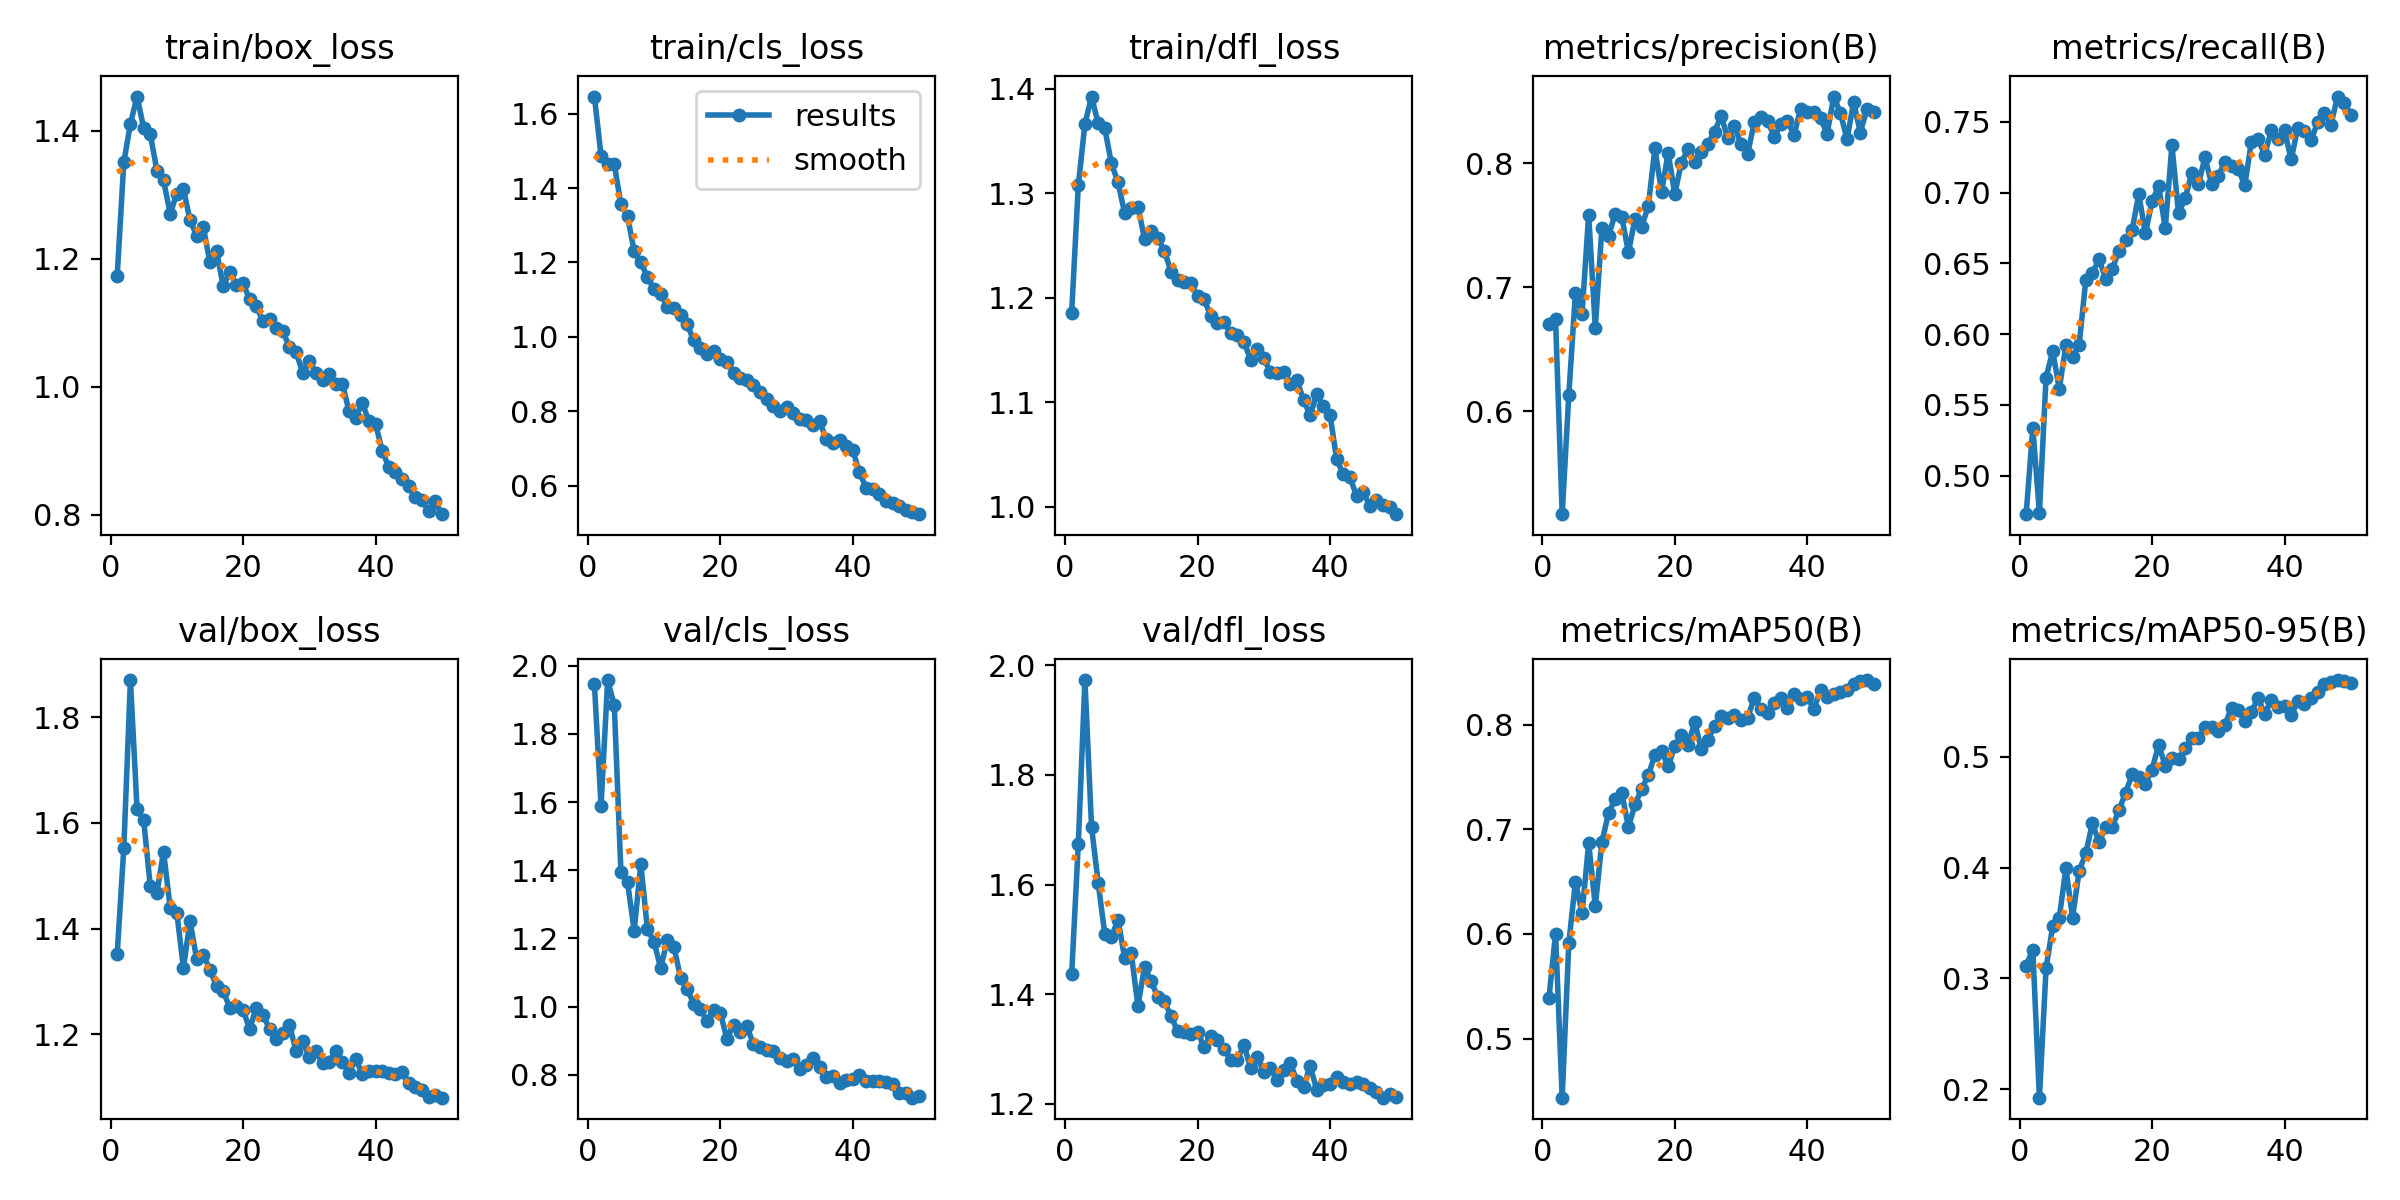

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/train/results.png')


In [ ]:
model = YOLO('runs/detect/train/weights/best.pt')
results = model.predict(source='/content/ryoji-iwata-n31JPLu8_Pw-unsplash.jpg', save=True)


image 1/1 /content/ryoji-iwata-n31JPLu8_Pw-unsplash.jpg: 640x448 22 Personas, 182.9ms
Speed: 2.8ms preprocess, 182.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict5


In [ ]:
# Load an image or video frame
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

img = cv2.imread('/content/nathan-anderson-GM5Yn5XRVqA-unsplash.jpg')  # Replace with frame from a video if needed

# Run inference
results = model.predict(source=img, conf=0.3, save=False)[0]

# Count people (class 0 = person in COCO)
person_count = sum(int(cls) == 0 for cls in results.boxes.cls.cpu().numpy())

# Draw person count on image
cv2.putText(img, f"People Count: {person_count}", (30, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)

# Optionally draw bounding boxes
for box, cls in zip(results.boxes.xyxy.cpu().numpy(), results.boxes.cls.cpu().numpy()):
    if int(cls) == 0:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, "Person", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the result using cv2_imshow
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.